# 图像分类数据集的使用

In [2]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import d2l.torch as d2l

d2l.use_svg_display()

## 读取数据集

In [5]:
# trans是干嘛的
trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(root='./data',train=True,transform=trans,download=True)

mnist_test = torchvision.datasets.FashionMNIST(root='./data',train=False,transform=trans,download=True)

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [7]:
# Fashion-MNIST由10个类别的图像组成
# 每个类别包含6000张训练图像和1000张测试图像
len(mnist_train), len(mnist_test)

(60000, 10000)

In [21]:
# 访问第0张图片的数据
mnist_train[0][0]
# 访问第0张图片的标签，范围0~9，代表10个类别
mnist_train[0][1]
# 每张图片高28宽28，通道数为1
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [22]:
# 将数字标签与文本名称转换
# d2l内置函数
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [23]:
# 显示数据集图像
# d2l内置函数
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """绘制图像列表""" 
    figsize = (num_cols * scale, num_rows * scale) 
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize) 
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)): 
        if torch.is_tensor(img): 
            # 图⽚张量 
            ax.imshow(img.numpy())
        else: 
            # PIL图⽚ 
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False) 
        ax.axes.get_yaxis().set_visible(False) 
        if titles: 
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

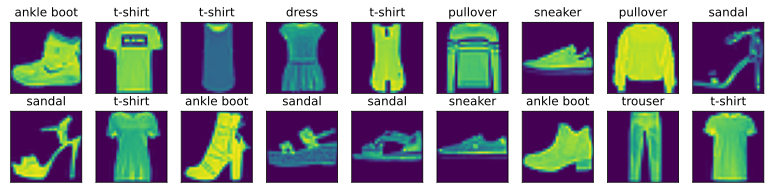

In [26]:
X, y = next(iter(data.DataLoader(mnist_train,batch_size=18)))
show_images(X.reshape(18,28,28),2,9,titles = get_fashion_mnist_labels(y))

## 读取小批量

In [41]:
batch_size = 2048

def get_dataloader_workers():
    """使用4进程读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers = get_dataloader_workers())


In [42]:
timer = d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'1.91 sec'

## 整合所有组件

In [32]:
def load_data_fashion_mnist(batch_size, resize = None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST( root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST( root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers()),data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=get_dataloader_workers()))

In [33]:
# 使用resize参数测试 load_data_fashion_mnist图像大小
train_iter, test_iter = load_data_fashion_mnist(32,resize=64)
for X,y in train_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    break

100.0%


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

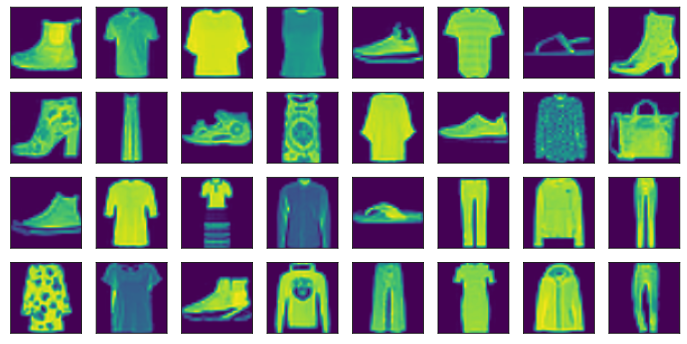

In [35]:
show_images(X.reshape(32,64,64),4,8)